
# Download dependencies

In [1]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [2]:
!git clone 'https://github.com/malajvan/stargan-v2'


Cloning into 'stargan-v2'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 290 (delta 9), reused 11 (delta 4), pack-reused 270
Receiving objects: 100% (290/290), 38.87 MiB | 20.38 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [3]:
!cd /content/stargan-v2 && git checkout leakyRELU #checkout to the right branch

Branch 'leakyRELU' set up to track remote branch 'leakyRELU' from 'origin'.
Switched to a new branch 'leakyRELU'


In [4]:
!pip3 install torch
!pip install torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip3 install opencv-python ffmpeg-python scikit-image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
! pip install scipy pillow==7.0.0 tqdm==4.43.0 munch==2.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 39.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 8.7 MB/s eta 0:00:00
  Created wheel for pillow: filename=Pillow-7.0.0-cp39-cp39-linux_x86_64.whl size=1282420 sha256=7050cb40ce72f281b417122a8954392f5acbc1ed28abf477959618c799ec58eb
  Stored in directory: /root/.cache/pip/wheels/62/61/7c/7929ba08e13d42751bf3d0799e467f75f4f1432ebcd5552b44
Successfully built pillow
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

# Download pretrained weights and dataset

In [7]:
%cd stargan-v2
!pwd

/content/stargan-v2
/content/stargan-v2


In [8]:
!bash download.sh celeba-hq-dataset
!bash download.sh pretrained-network-celeba-hq
!bash download.sh wing

Streaming output truncated to the last 5000 lines.
  inflating: ./data/celeba_hq/train/female/175906.jpg  
  inflating: ./data/celeba_hq/train/female/175910.jpg  
  inflating: ./data/celeba_hq/train/female/175935.jpg  
  inflating: ./data/celeba_hq/train/female/175939.jpg  
  inflating: ./data/celeba_hq/train/female/175940.jpg  
  inflating: ./data/celeba_hq/train/female/175949.jpg  
  inflating: ./data/celeba_hq/train/female/175951.jpg  
  inflating: ./data/celeba_hq/train/female/175960.jpg  
  inflating: ./data/celeba_hq/train/female/175986.jpg  
  inflating: ./data/celeba_hq/train/female/175993.jpg  
  inflating: ./data/celeba_hq/train/female/175999.jpg  
  inflating: ./data/celeba_hq/train/female/176029.jpg  
  inflating: ./data/celeba_hq/train/female/176042.jpg  
  inflating: ./data/celeba_hq/train/female/176053.jpg  
  inflating: ./data/celeba_hq/train/female/176060.jpg  
  inflating: ./data/celeba_hq/train/female/176061.jpg  
  inflating: ./data/celeba_hq/train/female/176064.jpg

#Run


In [9]:
!python main.py --mode sample --num_domains 2 --resume_iter 100000 --w_hpf 1 \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --result_dir expr/results/celeba_hq \
               --src_dir assets/representative/celeba_hq/src \
               --ref_dir assets/representative/celeba_hq/ref

Namespace(img_size=256, num_domains=2, latent_dim=16, hidden_dim=512, style_dim=64, lambda_reg=1, lambda_cyc=1, lambda_sty=1, lambda_ds=1, ds_iter=100000, w_hpf=1.0, randcrop_prob=0.5, total_iters=100000, resume_iter=100000, batch_size=8, val_batch_size=32, lr=0.0001, f_lr=1e-06, beta1=0.0, beta2=0.99, weight_decay=0.0001, num_outs_per_domain=10, mode='sample', num_workers=4, seed=777, train_img_dir='data/celeba_hq/train', val_img_dir='data/celeba_hq/val', sample_dir='expr/samples', checkpoint_dir='expr/checkpoints/celeba_hq', eval_dir='expr/eval', result_dir='expr/results/celeba_hq', src_dir='assets/representative/celeba_hq/src', ref_dir='assets/representative/celeba_hq/ref', inp_dir='assets/representative/custom/female', out_dir='assets/representative/celeba_hq/src/female', wing_path='expr/checkpoints/wing.ckpt', lm_path='expr/checkpoints/celeba_lm_mean.npz', print_every=10, sample_every=5000, save_every=10000, eval_every=50000)
Number of parameters of generator: 43467395
Number of p

In [10]:
#run evaluations. Metrics found in content/stargan-v2/expr/eval/celeba_hq/...

!python main.py --mode eval --num_domains 2 --w_hpf 1 \
               --resume_iter 100000 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --eval_dir expr/eval/celeba_hq

Namespace(img_size=256, num_domains=2, latent_dim=16, hidden_dim=512, style_dim=64, lambda_reg=1, lambda_cyc=1, lambda_sty=1, lambda_ds=1, ds_iter=100000, w_hpf=1.0, randcrop_prob=0.5, total_iters=100000, resume_iter=100000, batch_size=8, val_batch_size=32, lr=0.0001, f_lr=1e-06, beta1=0.0, beta2=0.99, weight_decay=0.0001, num_outs_per_domain=10, mode='eval', num_workers=4, seed=777, train_img_dir='data/celeba_hq/train', val_img_dir='data/celeba_hq/val', sample_dir='expr/samples', checkpoint_dir='expr/checkpoints/celeba_hq', eval_dir='expr/eval/celeba_hq', result_dir='expr/results', src_dir='assets/representative/celeba_hq/src', ref_dir='assets/representative/celeba_hq/ref', inp_dir='assets/representative/custom/female', out_dir='assets/representative/celeba_hq/src/female', wing_path='expr/checkpoints/wing.ckpt', lm_path='expr/checkpoints/celeba_lm_mean.npz', print_every=10, sample_every=5000, save_every=10000, eval_every=50000)
Number of parameters of generator: 43467395
Number of par

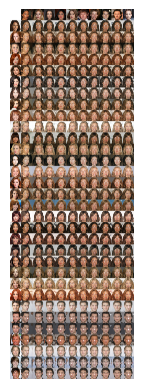

In [11]:
import cv2
from matplotlib import pyplot as plt
img_color=cv2.imread('expr/results/celeba_hq/reference.jpg')
RGB_img = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis("off")
plt.show()

In [12]:
!pwd

/content/stargan-v2
